In [15]:
import json
import pandas as pd
import numpy as np

## Zadanie 1.

1. Ilość wczytanych wierszy danych

In [16]:
netflix_data = pd.read_csv("netflix_titles.csv")
print(netflix_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


2. Wymiar wczytanych danych (kolumny x indeksy)

In [18]:
print(netflix_data.shape)

(7787, 12)


3. Zlicz ilość wartość pustych (jeśli w są) w każdej z kolumn

In [19]:
netflix_data.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Zadanie 2.

1. Zlicz ile jest wartości pustych w zbiorze NaN

In [26]:
import seaborn as sns

In [61]:
data_titanic = sns.load_dataset("titanic")
print(data_titanic.info())
print(data_titanic.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
869


2. Zlicz ilość wartość pustych (null) w każdej kolumnie, a wynik zapisz w postaci sumy
skumulowanej

In [57]:
print(data_titanic.isnull().cumsum())

     survived  pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
0           0       0    0    0      0      0     0         0      0    0   
1           0       0    0    0      0      0     0         0      0    0   
2           0       0    0    0      0      0     0         0      0    0   
3           0       0    0    0      0      0     0         0      0    0   
4           0       0    0    0      0      0     0         0      0    0   
..        ...     ...  ...  ...    ...    ...   ...       ...    ...  ...   
886         0       0    0  176      0      0     0         2      0    0   
887         0       0    0  176      0      0     0         2      0    0   
888         0       0    0  177      0      0     0         2      0    0   
889         0       0    0  177      0      0     0         2      0    0   
890         0       0    0  177      0      0     0         2      0    0   

     adult_male  deck  embark_town  alive  alone  
0             0     1   

3. Usuń te kolumny, jeśli takie istnieją dla których liczba wartości pustych jest większa
niż 30% wielkości pobranego zbioru danych

In [58]:
max_number_of_nans = len(data_titanic.index)*0.3
data_titanic = data_titanic.loc[:, (data_titanic.isnull().sum(axis=0) <= max_number_of_nans)]
print(data_titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  


4. Zamień dane kategoryczne w kolumnie sex {female,male} na wartości liczbowe {0,1}

In [59]:
print(data_titanic["sex"].value_counts())
x = {"sex": {"female": 0, "male": 1}}
data_titanic = data_titanic.replace(x)
print(data_titanic["sex"].value_counts())

male      577
female    314
Name: sex, dtype: int64
1    577
0    314
Name: sex, dtype: int64


## Zadanie 3.

1. Odszukaj profil o nazwie użytkownika: MikiKru

In [65]:
import requests
import json

In [67]:
r = requests.get("https://api.github.com/users/MikiKru")
json.loads(r.content)

{'login': 'MikiKru',
 'id': 25902843,
 'node_id': 'MDQ6VXNlcjI1OTAyODQz',
 'avatar_url': 'https://avatars.githubusercontent.com/u/25902843?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/MikiKru',
 'html_url': 'https://github.com/MikiKru',
 'followers_url': 'https://api.github.com/users/MikiKru/followers',
 'following_url': 'https://api.github.com/users/MikiKru/following{/other_user}',
 'gists_url': 'https://api.github.com/users/MikiKru/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/MikiKru/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/MikiKru/subscriptions',
 'organizations_url': 'https://api.github.com/users/MikiKru/orgs',
 'repos_url': 'https://api.github.com/users/MikiKru/repos',
 'events_url': 'https://api.github.com/users/MikiKru/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/MikiKru/received_events',
 'type': 'User',
 'site_admin': False,
 'name': None,
 'company': None,
 'blog': '',
 'loca

2. Oblicz statystykę języków programowania publikowanych w powyższym
repozytorium, tj. jaki udział procentowy ma danych język programowania względem
wszystkich repozytoriów użytkownika MikiKru

In [69]:
r = requests.get("https://api.github.com/users/MikiKru/repos")
repositories = json.loads(r.content)
languages = [str(repo["language"]) for repo in repositories]
print(languages)

['Python', 'None', 'Python', 'Java', 'Python', 'Java', 'Java', 'Java', 'C++', 'C++', 'C++', 'C++', 'TSQL', 'C#', 'Java', 'None', 'None', 'Jupyter Notebook', 'None', 'Java', 'Java', 'CMake', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java']


In [70]:
languages_info = np.unique(languages, return_counts=True)
print(languages_info)

(array(['C#', 'C++', 'CMake', 'Java', 'Jupyter Notebook', 'None', 'Python',
       'TSQL'], dtype='<U16'), array([ 1,  4,  1, 15,  1,  4,  3,  1], dtype=int64))


3. Wynik zaprezentuj ja pomocą wykresu kołowego

In [71]:
import matplotlib.pyplot as plt

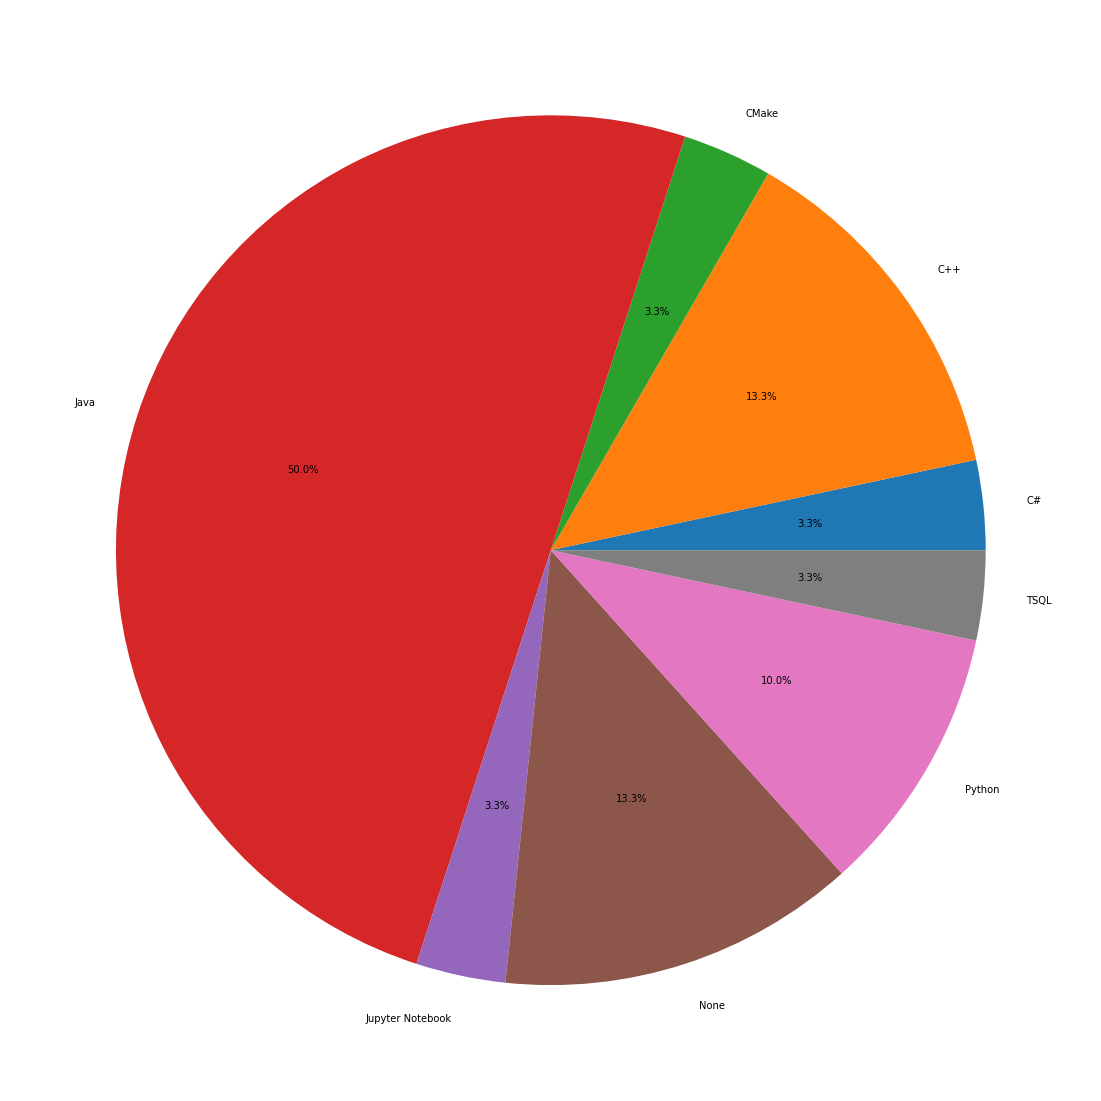

In [72]:
plt.figure(figsize=(20, 20))
plt.pie(languages_info[1], labels=languages_info[0], autopct='%1.1f%%')
plt.show()

## Zadanie 4.

In [89]:
from bs4 import BeautifulSoup
import datetime

In [98]:
data = requests.get("https://pogoda.interia.pl/prognoza-dlugoterminowa-bydgoszcz,cId,3696")
html = BeautifulSoup(data.content, 'html.parser')
class_name = 'weather-currently-temp-strict'
temperature_now = html.find("div", attrs={'class' : class_name})
temperature_now = str(temperature_now).replace('<div class="weather-currently-temp-strict">',"").replace("</div>","")
now = datetime.datetime.now()
now = now.strftime("%d.%m.%Y %H:%M")
print("Data:", now)
print()
print("Temperatura:", temperature_now)
print()
class_name_tomorrow_max = "weather-currently-middle-forecast-temperature-max"
temperature_tomorrow_max = html.find("span", attrs={'class': class_name_tomorrow_max})
temperature_tomorrow_max = str(temperature_tomorrow_max).replace('<span class="weather-currently-middle-forecast-temperature-max" id="weather-currently-middle-forecast-temperature-max-0">', "").replace("</span>", "")
class_name_tomorrow_min = "weather-currently-middle-forecast-temperature-min"
temperature_tomorrow_min = html.find("span", attrs={'class': class_name_tomorrow_min})
temperature_tomorrow_min = str(temperature_tomorrow_min).replace('<span class="weather-currently-middle-forecast-temperature-min" id="weather-currently-middle-forecast-temperature-min-0">', "").replace("</span>", "")
print("Jutro: ", temperature_tomorrow_max, "/", temperature_tomorrow_min)

Data: 20.03.2021 20:21

Temperatura: 0°C

Jutro:  5°C / -4°C
